In this notebook I shall use the cleaned up census data to look at the distribution of the proportion of people in different age ranges across the Local Authorities. I have decided to split the ages into three ranges: children and young people (aged 0-19), working age adults (aged 20-64), and older people (aged 65+).I will produce histograms to show how the proportion of the population in each categories varies in the Local Authorities.  

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
census_demographic_df = pd.read_csv(r"cleaned_census_df.csv", index_col=0)

census_demographic_df.head()

,Area code,Area name,All persons,Females:Aged 4 years and under,Females:Aged 5 to 9 years,Females:Aged 10 to 14 years,Females:Aged 15 to 19 years,Females:Aged 20 to 24 years,Females:Aged 25 to 29 years,Females:Aged 30 to 34 years,...,Males:Aged 50 to 54 years,Males:Aged 55 to 59 years,Males:Aged 60 to 64 years,Males:Aged 65 to 69 years,Males:Aged 70 to 74 years,Males:Aged 75 to 79 years,Males:Aged 80 to 84 years,Males:Aged 85 to 89 years,Males:Aged 90 years and over,Region
0,E06000047,County Durham,522100,12000,13800,14400,15300,16400,15000,16000,...,18600,19500,17200,15400,14800,10300,6700,3400,1400,North East
1,E06000005,Darlington,107800,2700,3000,3300,2800,2800,3300,3600,...,3800,3900,3400,3000,2800,2000,1400,800,300,North East
2,E06000001,Hartlepool,92300,2400,2700,2900,2500,2600,2900,3100,...,3100,3400,3200,2600,2400,1500,1000,600,200,North East
3,E06000002,Middlesbrough,143900,4400,4700,4600,4200,4900,5200,5200,...,4200,4600,4300,3500,3100,2000,1400,700,300,North East
4,E06000057,Northumberland,320600,7000,8100,8400,7400,6700,8000,8700,...,11200,12400,11900,11100,11100,7600,4700,2500,1100,North East


In [4]:
#Create list of columns with data on females only
females_la_cols = [col for col in census_demographic_df.columns if 'Females' in col]

#Create list of columns with data on males only
males_la_cols = [col for col in census_demographic_df.columns if 'Males' in col]

la_cols = females_la_cols + males_la_cols
la_cols

['Females:Aged 4 years and under',
 'Females:Aged 5 to 9 years',
 'Females:Aged 10 to 14 years',
 'Females:Aged 15 to 19 years',
 'Females:Aged 20 to 24 years',
 'Females:Aged 25 to 29 years',
 'Females:Aged 30 to 34 years',
 'Females:Aged 35 to 39 years',
 'Females:Aged 40 to 44 years',
 'Females:Aged 45 to 49 years',
 'Females:Aged 50 to 54 years',
 'Females:Aged 55 to 59 years',
 'Females:Aged 60 to 64 years',
 'Females:Aged 65 to 69 years',
 'Females:Aged 70 to 74 years',
 'Females:Aged 75 to 79 years',
 'Females:Aged 80 to 84 years',
 'Females:Aged 85 to 89 years',
 'Females:Aged 90 years and over',
 'Males:Aged 4 years and under',
 'Males:Aged 5 to 9 years',
 'Males:Aged 10 to 14 years',
 'Males:Aged 15 to 19 years',
 'Males:Aged 20 to 24 years',
 'Males:Aged 25 to 29 years',
 'Males:Aged 30 to 34 years',
 'Males:Aged 35 to 39 years',
 'Males:Aged 40 to 44 years',
 'Males:Aged 45 to 49 years',
 'Males:Aged 50 to 54 years',
 'Males:Aged 55 to 59 years',
 'Males:Aged 60 to 64 years

In [5]:
#Create new dataframe to store percentages of females and males in each age group by LA
la_proportions_df = census_demographic_df[['Area name','Area code', 'Region','All persons']].copy()
for i in la_cols: 
    la_proportions_df['%' + i] = census_demographic_df[i]/census_demographic_df['All persons']*100
    
la_proportions_df

,Area name,Area code,Region,All persons,%Females:Aged 4 years and under,%Females:Aged 5 to 9 years,%Females:Aged 10 to 14 years,%Females:Aged 15 to 19 years,%Females:Aged 20 to 24 years,%Females:Aged 25 to 29 years,...,%Males:Aged 45 to 49 years,%Males:Aged 50 to 54 years,%Males:Aged 55 to 59 years,%Males:Aged 60 to 64 years,%Males:Aged 65 to 69 years,%Males:Aged 70 to 74 years,%Males:Aged 75 to 79 years,%Males:Aged 80 to 84 years,%Males:Aged 85 to 89 years,%Males:Aged 90 years and over
0,County Durham,E06000047,North East,522100,2.298410,2.643172,2.758092,2.930473,3.141161,2.873013,...,2.949627,3.562536,3.734917,3.294388,2.949627,2.834706,1.972802,1.283279,0.651216,0.268148
1,Darlington,E06000005,North East,107800,2.504638,2.782931,3.061224,2.597403,2.597403,3.061224,...,3.061224,3.525046,3.617811,3.153989,2.782931,2.597403,1.855288,1.298701,0.742115,0.278293
2,Hartlepool,E06000001,North East,92300,2.600217,2.925244,3.141928,2.708559,2.816901,3.141928,...,2.925244,3.358613,3.683640,3.466956,2.816901,2.600217,1.625135,1.083424,0.650054,0.216685
3,Middlesbrough,E06000002,North East,143900,3.057679,3.266157,3.196664,2.918694,3.405142,3.613621,...,2.710215,2.918694,3.196664,2.988186,2.432245,2.154274,1.389854,0.972898,0.486449,0.208478
4,Northumberland,E06000057,North East,320600,2.183406,2.526513,2.620087,2.308172,2.089832,2.495321,...,2.963194,3.493450,3.867748,3.711790,3.462258,3.462258,2.370555,1.466001,0.779788,0.343107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Caerphilly,W06000018,Wales,175900,2.615122,2.899375,3.013076,2.558272,2.501421,3.183627,...,3.069926,3.524730,3.581580,3.069926,2.671973,2.728823,1.876066,1.193860,0.568505,0.227402
327,Blaenau Gwent,W06000019,Wales,66900,2.541106,2.690583,2.840060,2.391629,2.690583,3.437967,...,3.139013,3.587444,3.886398,3.139013,2.840060,2.840060,1.943199,1.195815,0.597907,0.149477
328,Torfaen,W06000020,Wales,92300,2.600217,2.816901,2.925244,2.491874,2.491874,3.250271,...,2.816901,3.358613,3.575298,3.141928,2.708559,2.708559,1.950163,1.191766,0.650054,0.325027
329,Monmouthshire,W06000021,Wales,93000,2.043011,2.365591,2.688172,2.365591,1.935484,2.365591,...,3.010753,3.763441,4.086022,3.548387,3.225806,3.333333,2.473118,1.612903,0.967742,0.430108


In [6]:
#Produce list of columns to be included in the age range 0-19
zero_to_nineteen_group_list = ['Females:Aged 4 years and under', 'Females:Aged 5 to 9 years','Females:Aged 10 to 14 years', 'Females:Aged 15 to 19 years', 'Males:Aged 4 years and under','Males:Aged 5 to 9 years', 'Males:Aged 10 to 14 years', 'Males:Aged 15 to 19 years']
mystring = '%'
zero_to_nineteen_group_list = [mystring + s for s in zero_to_nineteen_group_list]

#Produce list of columns to be included in the age range 20-64
twenty_to_sixty_four_group_list = ['Females:Aged 20 to 24 years',
                                   'Females:Aged 25 to 29 years',
                                   'Females:Aged 30 to 34 years',
                                   'Females:Aged 35 to 39 years',
                                   'Females:Aged 40 to 44 years',
                                   'Females:Aged 45 to 49 years',
                                   'Females:Aged 50 to 54 years',
                                   'Females:Aged 55 to 59 years',
                                   'Females:Aged 60 to 64 years',
                                   'Males:Aged 20 to 24 years',
                                   'Males:Aged 25 to 29 years',
                                   'Males:Aged 30 to 34 years',
                                   'Males:Aged 35 to 39 years',
                                   'Males:Aged 40 to 44 years',
                                   'Males:Aged 45 to 49 years',
                                   'Males:Aged 50 to 54 years',
                                   'Males:Aged 55 to 59 years',
                                   'Males:Aged 60 to 64 years']
twenty_to_sixty_four_group_list = [mystring + s for s in twenty_to_sixty_four_group_list]

#Produce list of columns to be included in the age range 65+
sixty_five_and_over_group_list = ['Females:Aged 65 to 69 years',
                                  'Females:Aged 70 to 74 years',
                                  'Females:Aged 75 to 79 years',
                                  'Females:Aged 80 to 84 years',
                                  'Females:Aged 85 to 89 years',
                                  'Females:Aged 90 years and over',
                                  'Males:Aged 65 to 69 years',
                                  'Males:Aged 70 to 74 years',
                                  'Males:Aged 75 to 79 years',
                                  'Males:Aged 80 to 84 years',
                                  'Males:Aged 85 to 89 years',
                                  'Males:Aged 90 years and over']

sixty_five_and_over_group_list = [mystring + s for s in sixty_five_and_over_group_list]

#Produce list of columns to be included in the age range 0-34
zero_to_thirty_four_group_list = ['Females:Aged 4 years and under', 
                                  'Females:Aged 5 to 9 years',
                                  'Females:Aged 10 to 14 years', 
                                  'Females:Aged 15 to 19 years', 
                                  'Males:Aged 4 years and under',
                                  'Males:Aged 5 to 9 years', 
                                  'Males:Aged 10 to 14 years', 
                                  'Males:Aged 15 to 19 years',
                                  'Females:Aged 20 to 24 years',
                                 'Females:Aged 25 to 29 years',
                                  'Females:Aged 30 to 34 years',
                                  'Males:Aged 20 to 24 years',
                                  'Males:Aged 25 to 29 years',
                                  'Males:Aged 30 to 34 years']
                                 
zero_to_thirty_four_group_list = [mystring + s for s in zero_to_thirty_four_group_list]

In [7]:
#Modify la_proportions df to only show age ranges in list above
la_proportions_df['Proportion pop aged 0-19'] =  la_proportions_df[zero_to_nineteen_group_list ].sum(axis=1)
la_proportions_df['Proportion pop aged 20-64'] =  la_proportions_df[twenty_to_sixty_four_group_list].sum(axis=1)
la_proportions_df['Proportion pop aged 65+'] =  la_proportions_df[sixty_five_and_over_group_list ].sum(axis=1)

la_proportions_df['Proportion pop aged 0-34'] =  la_proportions_df[zero_to_thirty_four_group_list].sum(axis=1)

la_proportions_df = la_proportions_df[['Area name','Area code', 'Region','Proportion pop aged 0-19','Proportion pop aged 20-64', 'Proportion pop aged 65+', 'Proportion pop aged 0-34', 'All persons']]
la_proportions_df

,Area name,Area code,Region,Proportion pop aged 0-19,Proportion pop aged 20-64,Proportion pop aged 65+,Proportion pop aged 0-34,All persons
0,County Durham,E06000047,North East,21.796591,56.904808,21.356062,39.590117,522100
1,Darlington,E06000005,North East,22.541744,56.957328,20.686456,39.888683,107800
2,Hartlepool,E06000001,North East,23.401950,56.663055,19.718310,41.170098,92300
3,Middlesbrough,E06000002,North East,25.573315,57.748436,16.817234,46.977067,143900
4,Northumberland,E06000057,North East,19.962570,54.585153,25.452277,34.591391,320600
...,...,...,...,...,...,...,...,...
326,Caerphilly,W06000018,Wales,22.797044,57.248437,20.011370,40.648096,175900
327,Blaenau Gwent,W06000019,Wales,21.375187,58.295964,20.328849,40.209268,66900
328,Torfaen,W06000020,Wales,22.535211,56.446371,20.801733,40.628386,92300
329,Monmouthshire,W06000021,Wales,19.677419,54.623656,25.913978,33.763441,93000


In [8]:
la_proportions_df.describe()

,Proportion pop aged 0-19,Proportion pop aged 20-64,Proportion pop aged 65+,Proportion pop aged 0-34,All persons
count,331.000000,331.000000,331.000000,331.000000,3.310000e+02
mean,22.487586,57.671129,19.935056,40.997544,1.800529e+05
std,2.418400,3.895428,4.998504,5.460765,1.214260e+05
min,9.302326,49.087003,5.671930,29.126214,2.100000e+03
25%,20.927640,55.250087,17.038823,37.137977,1.033000e+05
50%,22.535211,57.248437,20.057307,40.191898,1.419000e+05
75%,23.967155,58.791758,23.515459,44.254085,2.178000e+05
max,31.521243,77.906977,33.398058,61.102159,1.144900e+06


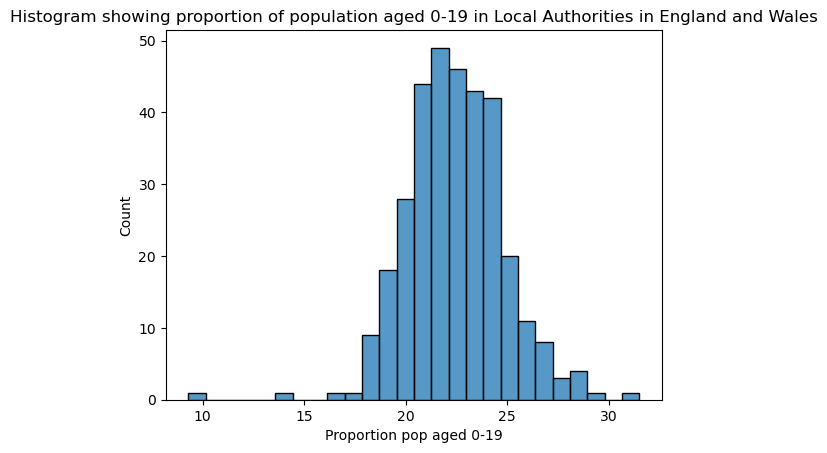

In [9]:
#Produce histogram showing distribution of LAs for age range 0-19
sns.histplot(data=la_proportions_df, x="Proportion pop aged 0-19")
plt.title('Histogram showing proportion of population aged 0-19 in Local Authorities in England and Wales');

The histogram is slightly right-skew. It shows the vast majority of Local Authorities have between 20-25% of their population aged 0-19. However, there are a number of outliers, two LAs have less than 15% of their population between 0-19 and one LA has above 30% of its population aged 0-19.

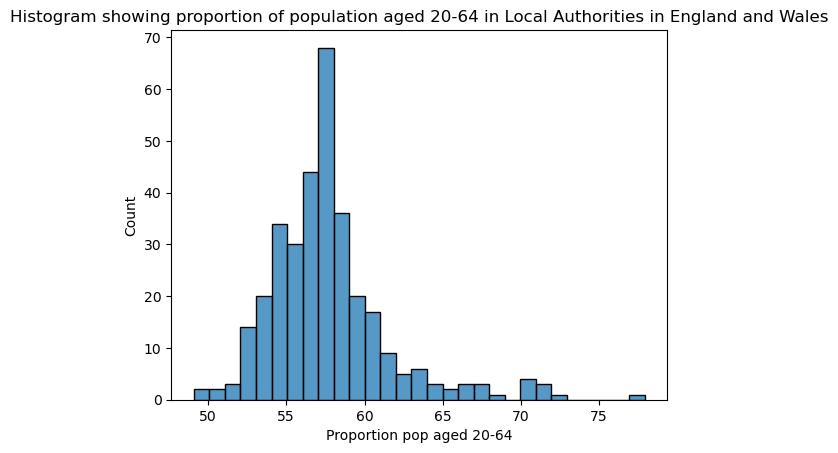

In [11]:
#Produce histogram showing distribution of LAs for age range 20-64
sns.histplot(data=la_proportions_df, x="Proportion pop aged 20-64")
plt.title('Histogram showing proportion of population aged 20-64 in Local Authorities in England and Wales');

This histogram is also right-skewed. Most Local Authorities have between 54-59% of their population aged between 20-64. However, there is some variation with a few LAs approaching 70% and one outlier above 75%.  

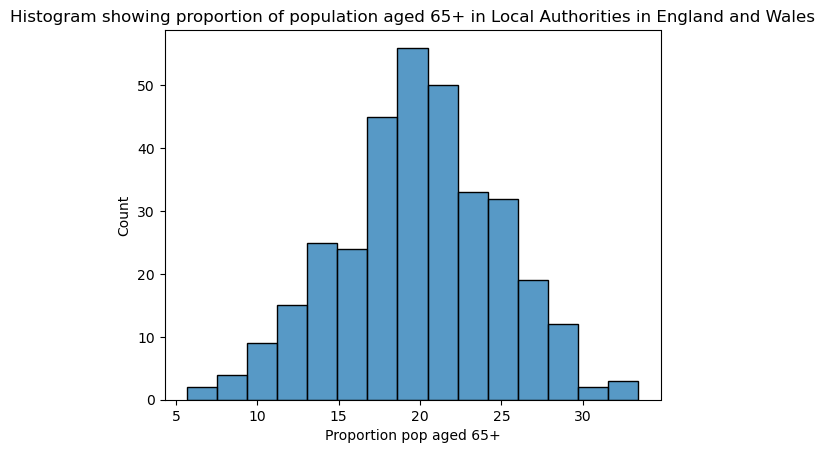

In [13]:
#Produce histogram showing distribution of LAs for age range 65+
sns.histplot(data=la_proportions_df, x="Proportion pop aged 65+")
plt.title('Histogram showing proportion of population aged 65+ in Local Authorities in England and Wales');

This histogram is more symmetrical although with a slight left-skew. The majority of Local Authorities have around 17-26% of their population aged 65 or over.  

In [14]:
la_proportions_df.to_csv('age_group_proportions_census_df.csv')